<a href="https://colab.research.google.com/github/ahcamachod/1918-machine-learning-clasificacion-con-sklearn/blob/proyecto-final/ML_clasificacion_con_SKLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning: Clasificación con SKLearn**

En este notebook estaremos desarrollando varios ejercicios para entender cómo funcionan algunos algoritmos de clasificación.


## Aula 1: Introducción a la clasificación.

In [61]:
# features 1 = sí y 0= no
# tiene el pelo largo?
# tiene las uñas afiladas?
# hace miau?
#"x" se refeire a los atributos y "y" a la clacificacion
perro1= [0,1,1]
perro2= [1,0,1]
perro3= [1,1,1]

gato1= [0,1,0]
gato2= [0,1,1]
gato3= [1,1,0]

x_train= [perro1, perro2, perro3, gato1, gato2, gato3]
y_train = [1,1,1,0,0,0]

In [62]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(x_train,y_train)

LinearSVC()

In [63]:
animal_misterioso= [1,1,1]
model.predict([animal_misterioso])

array([1])

In [64]:
misterio1 = [1,1,1]
misterio2 = [1,1,0]
misterio3 = [0,1,1]

x_test = [misterio1, misterio2, misterio3]
y_test = [0,1,1]

In [65]:
previsiones= model.predict(x_test)

In [66]:
correctos = (previsiones==y_test).sum()
total = len(x_test)
tasa_de_acierto = correctos/total
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

La tasa de acierto fue de: 33.33%


In [67]:
from sklearn.metrics import accuracy_score
#la funcion acurracy_sore pide dos parametros el valor vedarero y el valor predicho
tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

La tasa de acierto fue de: 33.33%


## Aula 2: Pruebas replicables, estratificación, lectura de datos de internet.

In [68]:
import pandas as pd
uri = 'https://gist.githubusercontent.com/ahcamachod/38673f75b54ec62ffc290eff8e7c716e/raw/6eaa07e199d9f668bf94a034cb84dac58c82fa4f/tracking.csv'
datos = pd.read_csv(uri)
datos.sample(5)

,home,how_it_works,contact,bought
46,1,0,1,1
35,1,0,1,1
60,1,0,1,1
42,0,1,0,0
49,1,1,0,0


In [69]:
mapa = {
          "home":"principal",
          "how_it_works":"como_funciona",
          "contact":"contacto",
          "bought":"compro"
        }

datos = datos.rename(columns=mapa)
datos.sample(3)

,principal,como_funciona,contacto,compro
78,0,0,1,0
91,1,1,0,0
27,1,0,1,1


In [70]:
x = datos[['principal','como_funciona','contacto']]
x.head()

,principal,como_funciona,contacto
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


In [71]:
y = datos.compro
y.head()

0    0
1    0
2    0
3    0
4    0
Name: compro, dtype: int64

In [72]:
datos.shape
#tenemos 99 filas y 4 columnas

(99, 4)

In [73]:
#tomamos los primeros 75 para el entranamiento y el resto lo usamos para las pruebas.
x_train = x[:75]
y_train = y[:75]
x_test = x[75:]
y_test = y[75:]

In [74]:
#el modeloentreno con  50 calses que no compo y 24 clases si compro
y_train.value_counts()

0    48
1    27
Name: compro, dtype: int64

In [75]:
#el entro con una proporcion de clases que si compro del 36%
27/75

0.36

In [76]:
#el probo con 16 muestras de clase s q no compor y 9 clases q si compro
y_test.value_counts()

0    18
1     6
Name: compro, dtype: int64

In [77]:
#en el momento de probar solo tomo el 25% de la clses q si compro
6/24

0.25

In [78]:
#tenemos una diferencia de proporciones peligrosa.

In [79]:
print(f"Entrenaremos con {len(x_train)} elementos y probaremos con {len(x_test)} elementos.")

Entrenaremos con 75 elementos y probaremos con 24 elementos.


In [80]:
#reutilizamos codigo que suamos en el modelo anterior del aula 1.
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score


model = LinearSVC()
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

La tasa de acierto fue de: 95.83%


In [81]:
#
from sklearn.model_selection import train_test_split
#estado de aletoriedad
SEED=42
#esta funcion pide los parametros de x(atributos)y(clasificacion)el tamaño y estado de aletoridad(random_state=SEED)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=SEED)

model = LinearSVC()
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

La tasa de acierto fue de: 96.0%


In [82]:
#copiamos el codigo anterior
from sklearn.model_selection import train_test_split

SEED=42
#agremos un neuvo parametro que es estratificar(stratify=y) para evitar una peligrosa diferencia de proporciones entre loq se entre y se prueba.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=SEED, stratify=y)#usamos "y" que es la clase de nuestro modelo.

model = LinearSVC()
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

La tasa de acierto fue de: 96.0%


In [83]:
y_train.value_counts()

0    49
1    25
Name: compro, dtype: int64

In [84]:
25/74
#tenemos uan proporcion de 33% entre lasq tomo para entrenar y las q tomo para probar de nuestras calses del modelo

0.33783783783783783

In [85]:
y_test.value_counts()

0    17
1     8
Name: compro, dtype: int64

In [86]:
8/25
##tenemos uan proporcion de 32% entre lasq tomo para entrenar y las q tomo para probar de nuestras calses del modelo

0.32

In [87]:
#tenemos una valor mas cerca entre las proporciones tomaas para entrenar y probar.

## Aula 3: Proyecto de baja dimensionalidad y Baseline

In [88]:
uri = 'https://gist.githubusercontent.com/ahcamachod/7c55640f0d65bcbd31bb986bb599180c/raw/1b616e97a8719b3ff245fcdd68eaebdb8da38082/projects.csv'

datos = pd.read_csv(uri)
datos.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [89]:
#cambiamos los nombres de la columnas
mapa = {
        'unfinished':'no_finalizado',
        'expected_hours':'horas_esperadas',
        'price':'precio'
        }

datos = datos.rename(columns=mapa)
datos.sample(3)

,no_finalizado,horas_esperadas,precio
1503,0,34,391
1322,0,87,11699
217,1,24,176


In [90]:
#agremoas una nueva columna "finalizado" donde finalizado es 1 y no fanalizado es 0.
#tambine invertimos los daots de la columna no finalizado donde no finalizado es 1 y finalizado es 0.
cambio = {1:0, 0:1}

datos['finalizado'] = datos.no_finalizado.map(cambio)

In [91]:
datos.sample(5)

,no_finalizado,horas_esperadas,precio,finalizado
324,1,6,161,0
1343,0,26,233,1
63,1,84,2902,0
385,1,11,155,0
626,0,10,143,1


<Axes: xlabel='horas_esperadas', ylabel='precio'>

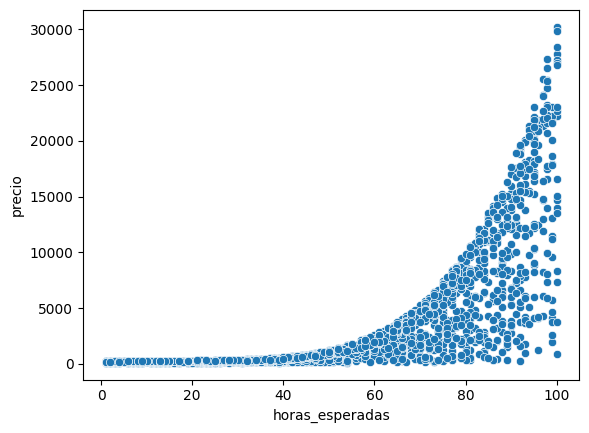

In [92]:
#graficamos
import seaborn as sns

sns.scatterplot(x='horas_esperadas', y='precio', data=datos)

<Axes: xlabel='horas_esperadas', ylabel='precio'>

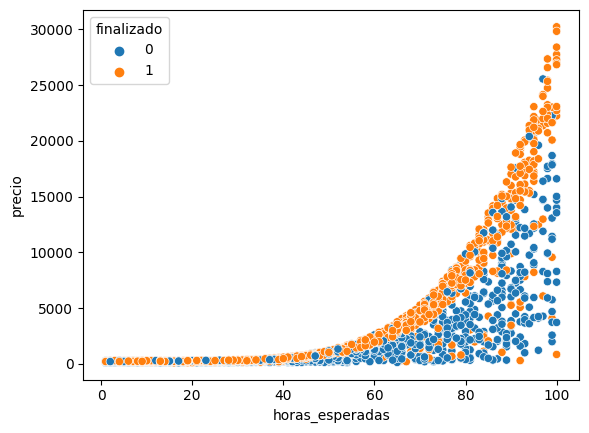

In [93]:
#adicinamos el parametro hue=. "0" no finalizado "1" finalizado
sns.scatterplot(x='horas_esperadas', y='precio', hue='finalizado', data=datos)

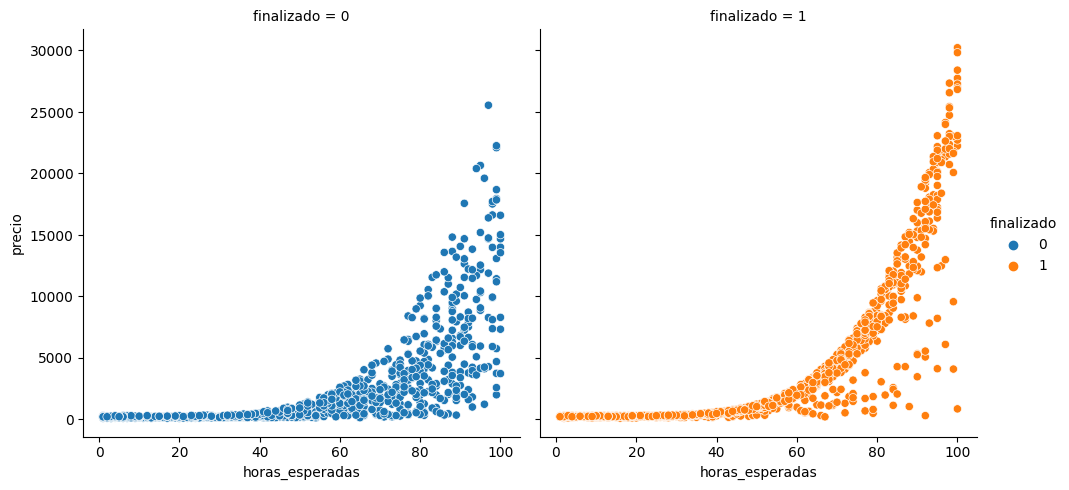

In [94]:
#separmos lasgraficas
sns.relplot(x='horas_esperadas', y='precio', hue='finalizado', data=datos, col='finalizado')

In [95]:
#
import numpy as np
#definimos nuestros datos
x= datos[['horas_esperadas','precio']]
y= datos.finalizado
#numpy nos ermite estrables un estado de aletoridad, ya no es neceario colocar el parametro en la line a de codigo de train_test-split
SEED = 42
np.random.seed(SEED)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,stratify=y)
#para ver con cuantos datos estamos entrenenadp

print(f"Entrenaremos con {len(x_train)} elementos y probaremos con {len(x_test)} elementos.")

model = LinearSVC()
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

Entrenaremos con 1617 elementos y probaremos con 540 elementos.
La tasa de acierto fue de: 57.59%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [96]:
#colocamos los 540 elelmentos para la prueba
base_previsiones = np.ones(540)
tasa_de_acierto = accuracy_score(y_test, base_previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')
#comprobamos la proporcion de la precicion con las y de prueba

La tasa de acierto fue de: 52.59%


<Axes: xlabel='horas_esperadas', ylabel='precio'>

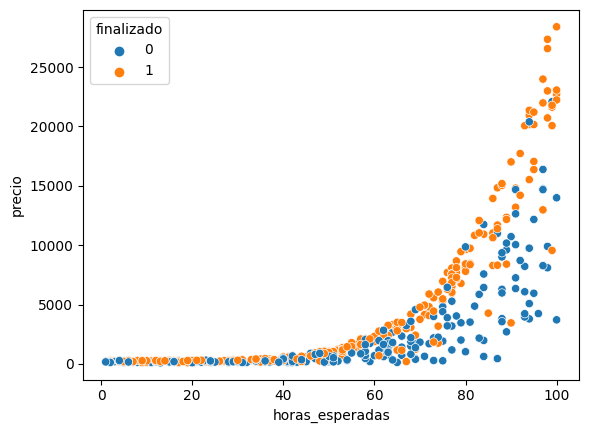

In [97]:
sns.scatterplot(x='horas_esperadas', y='precio', hue=y_test, data=x_test)

In [98]:
#establecesmo los valores de x y y.
x_min = x_test.horas_esperadas.min()
x_max = x_test.horas_esperadas.max()
y_min = x_test.precio.min()
y_max = x_test.precio.max()

In [117]:
#
pixels = 100
#creamos los eje x y y.
eje_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)
eje_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)

In [118]:
#con la funcion meshgrid unimos los puntos del eje x con los puntos del jej y
xx, yy = np.meshgrid(eje_x, eje_y)
#con la funcion ravel convirte una matriz en un vector.
puntos = np.c_[xx.ravel(), yy.ravel()]
puntos

array([[-1.72287835, -0.59438915],
       [-1.68822792, -0.59438915],
       [-1.65357749, -0.59438915],
       ...,
       [ 1.63821302,  5.04149362],
       [ 1.67286344,  5.04149362],
       [ 1.70751387,  5.04149362]])

In [101]:
#almacenamos el modelo predictivo de los puntos en una varaible
Z = model.predict(puntos)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


In [102]:
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

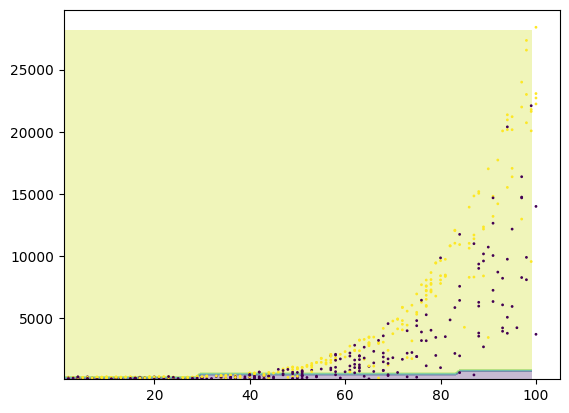

In [103]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(x_test.horas_esperadas, x_test.precio, c=y_test, s=1)

## Aula 4: Support Vector Machines y sistemas no lineales.

Entrenaremos con 1617 elementos y probaremos con 540 elementos.
La tasa de acierto fue de: 67.78%


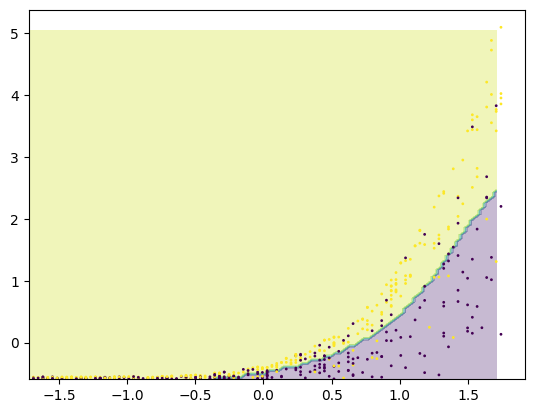

In [104]:
#recilcamos lineas de cosigo del anterior medelo.
#usaremos svc que es no lineas ya q nuesro mdelo es un curva.
from sklearn.svm import SVC
#impotamos standardscaler para estandarizar las escalas de los datos
from sklearn.preprocessing import StandardScaler

x= datos[['horas_esperadas','precio']]
y= datos.finalizado

SEED = 42
np.random.seed(SEED)

raw_x_train, raw_x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,stratify=y)
print(f"Entrenaremos con {len(x_train)} elementos y probaremos con {len(x_test)} elementos.")
#escalamos nuestros datos
scaler = StandardScaler()
scaler.fit(raw_x_train)
#trasformammos nuestos datos
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

model = SVC()
model.fit(x_train,y_train)
previsiones= model.predict(x_test)
#creamos dos nunevas variables apra poder trabajar con el min y max en numpy
#el modelo(SVC) trabaj con nympy, para encontrar los min ymax se los obtiene atraves d epandas.
data_x = x_test[:,0]
data_y = x_test[:,1]
#clocamos los rango de x y y min y max
x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eje_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)
eje_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)

xx, yy = np.meshgrid(eje_x, eje_y)
puntos = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(puntos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=y_test, s=1)

tasa_de_acierto = accuracy_score(y_test, previsiones)
#grafciamos nuestros datos
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

## Aula 5: Dummy classifiers y árboles de decisión.

In [119]:
uri = 'https://gist.githubusercontent.com/ahcamachod/1595316a6b37bf39baac355b081d9c3b/raw/98bc94de744764cef0e67922ddfac2a226ad6a6f/car_prices.csv'

datos = pd.read_csv(uri)
datos.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [120]:
#cambiamos los numbres con un diccionario
mapa = {
        'mileage_per_year':'millas_por_ano',
        'model_year':'ano_del_modelo',
        'price':'precio',
        'sold':'vendido'
        }

datos = datos.rename(columns=mapa)
datos.sample(3)

,Unnamed: 0,millas_por_ano,ano_del_modelo,precio,vendido
2943,2943,12257,2010,69443.55,no
7143,7143,22186,2000,81293.96,no
922,922,5625,2006,67155.02,no


In [107]:
#camabiamos con un diccionario los ceros y uno
cambio = {'no':0, 'yes':1}

datos.vendido = datos.vendido.map(cambio)
datos.sample(3)

,Unnamed: 0,millas_por_ano,ano_del_modelo,precio,vendido
7825,7825,11850,2006,54526.09,0
1339,1339,7848,2003,66631.71,1
1685,1685,21406,2007,44578.12,1


In [108]:
#importamos datetime
from datetime import datetime
#tomamos el año actual
ano_actual = datetime.today().year
#creamos un neuvo atributo
datos['edad_del_modelo'] = ano_actual - datos.ano_del_modelo
datos.sample(3)

,Unnamed: 0,millas_por_ano,ano_del_modelo,precio,vendido,edad_del_modelo
8290,8290,14255,2005,51606.00,1,18
8686,8686,21236,2006,37042.17,1,17
5642,5642,9998,2011,47241.59,1,12


In [109]:
#hacemos tro cambio cambaimos la columna por km por año
datos['km_por_ano'] = datos.millas_por_ano * 1.60934
datos.sample(3)

,Unnamed: 0,millas_por_ano,ano_del_modelo,precio,vendido,edad_del_modelo,km_por_ano
100,100,17000,2002,45343.51,1,21,27358.78000
5228,5228,15933,2000,61608.05,0,23,25641.61422
3569,3569,13512,2000,39647.42,1,23,21745.40208


In [110]:
#quitamos columnasy especificamosq son columna colocando axis 1
datos = datos.drop(columns=['Unnamed: 0', 'millas_por_ano','ano_del_modelo'], axis=1)
datos.sample(3)

,precio,vendido,edad_del_modelo,km_por_ano
689,47870.87,1,16,43307.33940
4978,35042.75,1,10,25730.12792
3483,39458.06,1,12,20506.21028


In [111]:
#reaprovechamos lineas de codigo de modelos anteirores
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
#elegimos las colunas q van ahacer atributos y calses
x= datos[['edad_del_modelo','km_por_ano', 'precio']]
y= datos.vendido

SEED = 42
np.random.seed(SEED)

raw_x_train, raw_x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,stratify=y)
print(f"Entrenaremos con {len(raw_x_train)} elementos y probaremos con {len(raw_x_test)} elementos.")
#escalamos los datos
scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)
#definismo el modelo y los datos q vamos usar de atributos y calses
model = SVC()
model.fit(x_train,y_train)
previsiones= model.predict(x_test)
#calcuaamos nuestra precicion
tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

Entrenaremos con 7500 elementos y probaremos con 2500 elementos.
La tasa de acierto fue de: 76.04%


In [112]:
#usamos dummy esun calsifcador nos aydua a tener una mejor best line
from sklearn.dummy import DummyClassifier
#almacenamos nuestro intancaidor en dummy
#dummy nos pdie como parametro elegir una estrageia y elegimos "strategy=''stratified''"
dummy = DummyClassifier(strategy='stratified')
#introducimos nuestros datos.
dummy.fit(x_train,y_train)
#calculamos la extitud
exactitud = dummy.score(x_test,y_test)*100
print(f'La exactitud del clasificador Dummy stratified fue: {round(exactitud,2)}%')

La exactitud del clasificador Dummy stratified fue: 52.64%


In [113]:
from sklearn.dummy import DummyClassifier
#almacenamos nuestro intancaidor en dummy
#dummy nos pdie como parametro elegir una estrageia y elegimos "strategy='most_frequent'"
dummy = DummyClassifier(strategy='most_frequent')
#introducimos nuestros datos.
dummy.fit(x_train,y_train)
#calculamos la extitud
exactitud = dummy.score(x_test,y_test)*100
print(f'La exactitud del clasificador Dummy most_frequent fue: {round(exactitud,2)}%')

La exactitud del clasificador Dummy most_frequent fue: 58.0%


In [ ]:
#tenemos q quedarnos con la mejor best line.

In [114]:
# Usando StandardScaler()
#estandarizando
#importamos elalgaritmo de arbol de decicion
from sklearn.tree import DecisionTreeClassifier
#rerilizamos el codigo anterior
x= datos[['edad_del_modelo','km_por_ano', 'precio']]
y= datos.vendido

SEED = 42
np.random.seed(SEED)

raw_x_train, raw_x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,stratify=y)
print(f"Entrenaremos con {len(raw_x_train)} elementos y probaremos con {len(raw_x_test)} elementos.")

scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)
#instaciamos el arbol de decicinones
model = DecisionTreeClassifier(max_depth=3)# le damos un profundidad maxima de 3
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

Entrenaremos con 7500 elementos y probaremos con 2500 elementos.
La tasa de acierto fue de: 78.04%


In [115]:
# Sin estandarizar

from sklearn.tree import DecisionTreeClassifier

x= datos[['edad_del_modelo','km_por_ano', 'precio']]
y= datos.vendido

SEED = 42
np.random.seed(SEED)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,stratify=y)
print(f"Entrenaremos con {len(x_train)} elementos y probaremos con {len(x_test)} elementos.")

model = DecisionTreeClassifier(max_depth=3)# le damos un profundidad maxima de 3
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

Entrenaremos con 7500 elementos y probaremos con 2500 elementos.
La tasa de acierto fue de: 78.04%


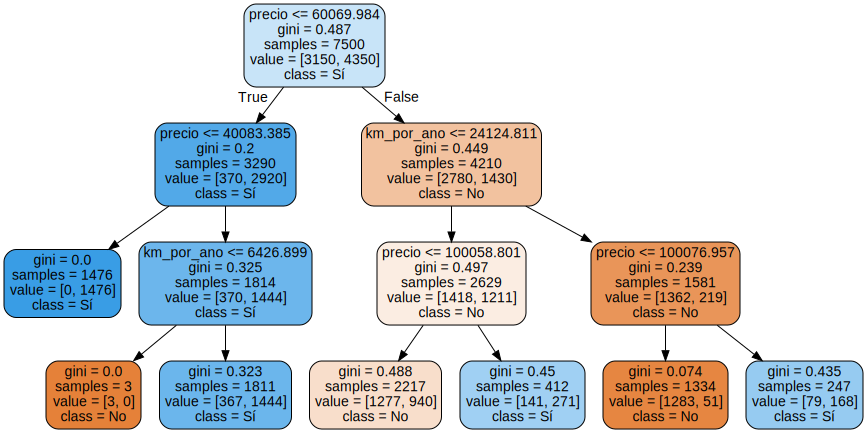

In [116]:
#importamos para ver la grafica del arbol de deciciones
from sklearn.tree import export_graphviz
import graphviz
#almacenamos nustras feactures en la varaible feactures de las columans de x
features = x.columns
#instaciamos nuestra funcion en una vaiable
#recibe varios parametros, nuestro modelo, las feactures,  el parametro rellenar"filled=True", redondemaos rounded=True, y el nombre de clase
dot_data = export_graphviz(model, feature_names=features, filled=True, rounded=True, class_names=['No','Sí'])
grafico = graphviz.Source(dot_data)#colcoamos como parametro juestro recuerso.
grafico
#mientras mas oscuro el color azul ams posibilidad q se venda